# Ensemble Model

- **Course**: Data Mining
- **Team Name**: The Awesome
- **Team Members**: Enes, Kemal, Ergin
- **Members Contribution**:
    - **Enes:** Steps 1-4
    - **Kemal:** Steps 5-7
    - **Ergin:** Steps 8-10

Step 0: Data Preparation and Cleaning
---


In [201]:
import pandas as pd

In [202]:
# Read CSV data into df
df = pd.read_csv('./theAwesome_EnsModel.csv')
# delete id column no need
df.drop('Id',axis=1,inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [203]:
# Learn the unique values in diagnosis column
print("Classification labels: ", df.Species.unique() )

Classification labels:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [204]:
# Mapping labels to numerical labels?
df.Species = df.Species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

Step 1: Data Information and Descriptive Statistics
---
Generate the information about your dataset: number of columns and rows, names and data types of
the columns, memory usage of the dataset.

> Hint: Pandas data frame info() function.

Generate descriptive statistics of all columns (input and output) of your dataset. Descriptive statistics for
numerical columns include: count, mean, std, min, 25 percentile (Q1), 50 percentile (Q2, median), 75
percentile (Q3), max values of the columns. For categorical columns, determine distinct values and their
frequency in each categorical column.

> Hint: Pandas, data frame describe() function.

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [206]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [207]:
df.Species.describe()

count    150.000000
mean       1.000000
std        0.819232
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Species, dtype: float64

Step 2: Train Test Split
---
Split your data into Training and Test data set by randomly selecting; use 70% for training and 30 % for
testing. Generate descriptive statistics of all columns (input and output) of Training and Test datasets.
Review the descriptive statistics of input output columns in Train, Test and original Full (before the
splitting operation) datasets and compare them to each other. Are they similar or not? Do you think
Train and Test dataset are representative of the Full datasets ? why ?

> Hint: Scikit learn, data train_test_split(), stratified function.

In [208]:
df.Species.value_counts(df.Species.unique()[0]) 

2    50
1    50
0    50
Name: Species, dtype: int64

In [209]:
# Splitting train and test data
# .7 and .3 
import numpy as np 
msk = np.random.rand(len(df)) < 0.7
train_df = df[msk]
test_df = df[~msk]

Step 3: Analysis of the Output Column
---
Analyze the output columns in Train and Test dataset. If the output column is numerical then calculate
the IQR (inter quartile range, Q3-Q1) and Range (difference between max and min value). If your output
column is categorical then determine if the column is nominal or ordinal, why?. Is there a class
imbalance problem? (check if there is big difference between the number of distinct values in your
categorical output column)

In [210]:
print(train_df["Species"].value_counts(train_df["Species"].unique()[0]))
print(len(train_df))
train_df.head()

1    34
2    33
0    29
Name: Species, dtype: int64
96


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,4.9,3.0,1.4,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
6,4.6,3.4,1.4,0.3,0
8,4.4,2.9,1.4,0.2,0


In [211]:
print(test_df["Species"].value_counts(test_df["Species"].unique()[0]))
print(len(test_df))
test_df.head()

0    21
2    17
1    16
Name: Species, dtype: int64
54


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
5,5.4,3.9,1.7,0.4,0
7,5.0,3.4,1.5,0.2,0
9,4.9,3.1,1.5,0.1,0


My target/label column is nominal categorical data. This data will  be used for multi-class classification. When I am splitting the test and train data, I was careful to get the similar ratio of the labels for each...

Step 4: Scale Training and Test dataset
---
Using one of the scaling method (max, min-max, standard or robust), create a scaler object and scale the
numerical input columns of the Training dataset. Using the same scaler object, scale the numerical input
columns of the Test set. Generate the descriptive statistics of the scaled input columns of Training and
Test set.
If some of the input columns are categorical then convert them to binary columns using one-hotencoder()
function (scikit learn) or dummy() function (Pandas data frame).

> Hint:
- http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing


In [212]:
# I am going to apply min-max scaling for my data.
from sklearn import preprocessing
# Fitting the minmax scaled version for training data
minmax_scale = preprocessing.MinMaxScaler().fit(train_df.iloc[:, :4])
# Now actually scale train and test data
train_df.iloc[:, :4] = minmax_scale.transform(train_df.iloc[:, :4])
test_df.iloc[:, :4] = minmax_scale.transform(test_df.iloc[:, :4])

/home/eneskemal/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [213]:
train_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,0.176471,0.454545,0.051724,0.041667,0
3,0.088235,0.500000,0.068966,0.041667,0
4,0.205882,0.727273,0.051724,0.041667,0
6,0.088235,0.636364,0.051724,0.083333,0
8,0.029412,0.409091,0.051724,0.041667,0


In [214]:
test_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,0.235294,0.681818,0.051724,0.041667,0
2,0.117647,0.545455,0.034483,0.041667,0
5,0.323529,0.863636,0.103448,0.125000,0
7,0.205882,0.636364,0.068966,0.041667,0
9,0.176471,0.500000,0.068966,0.000000,0


In [215]:
# Input and Output
inp_train = train_df.iloc[:, :4] 
out_train = train_df["Species"]
inp_test = test_df.iloc[:, :4] 
out_test = test_df["Species"]

Step 5: Build Predictive Model
---
Using one of the methods (Gradient Boosting Machines, Random Forest) build your ensemble predictive
model using the scaled input columns of Training set. To find the optimum values for the model
parameters, use Grid Search with k-fold cross-validation in building your model. Grid Search is one of
the method used to perform Hyper Parameter optimization to generate more accurate (better
generalized) models.

> Hint:
- http://scikit-learn.org/stable/supervised_learning.html#supervised-learning
- http://scikit-learn.org/stable/modules/cross_validation.html
- http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- http://scikit-learn.org/stable/modules/grid_search.html
- http://scikit-learn.org/stable/modules/ensemble.html#random-forests
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


In [216]:
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Building a RandomForest with 10 estimators
clf = RandomForestClassifier(n_estimators=10)

# clf = clf.fit(inp_train, out_train)
# 10-fold Cross validation
print("Average of 10 cross validation: ", np.mean(cross_val_score(clf, inp_train, out_train, cv=10)))

Average of 10 cross validation:  0.957575757576


In [217]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }
grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(inp_train, out_train)
print(grid_clf)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20], 'max_depth': [2, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)


In [218]:
print(grid_clf.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)


In [219]:
print(grid_clf.best_params_)

{'max_depth': 2, 'n_estimators': 10}


In [220]:
print(grid_clf.best_score_)

0.958333333333


In [221]:
# Optimized parameters:
clf = RandomForestClassifier(max_depth=2, n_estimators=10, random_state=None)
clf.fit(inp_train, out_train)
print("Average of 10 cross validation of optimized estimetor: ",
      np.mean(cross_val_score(clf, inp_train, out_train, cv=5)))

Average of 10 cross validation of optimized estimetor:  0.98


Step 6: Model Predictions on Training Dataset
---
Apply your model to input (scaled) columns of Training dataset to obtain the predicted output for
Training dataset. If your model is regression then plot actual output versus predicted output column of
Training dataset. If your model is classification then generate confusion matrix on actual and predicted
columns of Training dataset.

> Hint: Matplotlip, Seaborn, Bokeh scatter(), plot() functions
- http://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


In [222]:
# importing libraries for plotting
# Importing library for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
sns.set(style='darkgrid')

[[29  0  0]
 [ 0 32  2]
 [ 0  1 32]]


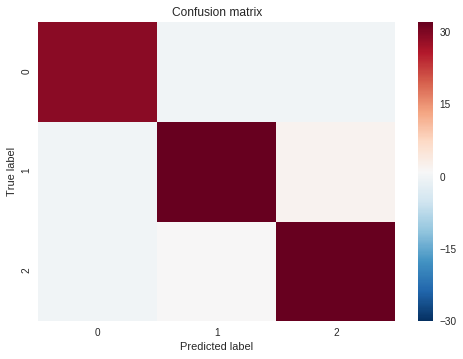

In [223]:
# train prediction for train data
out_train_pred = clf.predict(inp_train)
# Compute confusion matrix for prediction of train
cm = confusion_matrix(out_train, out_train_pred)
print(cm)

sns.heatmap(cm, center=True)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Step 7: Model Predictions on Test Dataset
---
Apply your model to input (scaled) columns of Test dataset to obtain the predicted output for Test
dataset. If your model is regression then plot actual output versus predicted output column of Test
dataset. If your model is classification then generate confusion matrix on actual and predicted columns
of Test dataset.

> Hint: Matplotlip, Seaborn, Bokeh scatter(), plot() functions
- http://scikit-learn.org/0.15/auto_examples/plot_confusion_matrix.html
- http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


[[21  0  0]
 [ 0 13  3]
 [ 0  0 17]]


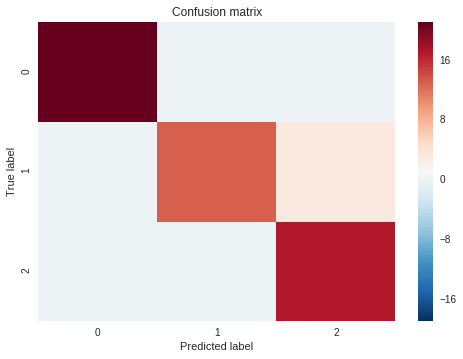

In [224]:
# test prediction for test data
out_test_pred = clf.predict(inp_test)
# Compute confusion matrix for prediction of train
cm = confusion_matrix(out_test, out_test_pred)
print(cm)

sns.heatmap(cm, center=True)
plt.title('Confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Step 8: Model Performance
---
Using one of the error (evaluation) metrics (classification or regression), calculate the performance of
the model on Training set and Test set. Compare the performance of the model on Training and Test set.
Which one (Training or Testing performance) is better, is there an overfitting case, why ?.
Would you deploy (Productionize) this model for using in your business system? why ?


**Classification Metrics: Accuracy, Precision, Recall, F-score, Recall, AUC, ROC etc
Regression Metrics: RMSE, MSE, MAE, R2 etc**

> Hint:
- http://scikit-learn.org/stable/model_selection.html#model-selection
- http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report


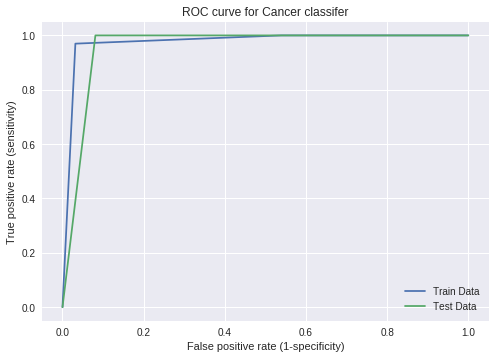

In [225]:
# I would like to use ROC
# Area under ROC Curve (or AUC for short) is 
#  a performance metric for binary classification problems.
from sklearn.metrics import roc_curve
# ROC curve for train data
fpr,tpr,thresholds = roc_curve(out_train, out_train_pred,pos_label=2)
# plot the curve
plt.plot(fpr, tpr, label="Train Data")
# ROC curve for test data
fpr, tpr, thresholds = roc_curve(out_test, out_test_pred, pos_label=2)
# Plotting the curves
plt.plot(fpr, tpr, label="Test Data")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)
plt.show()

Train data is performing slightly better than the test data however, I believe it is overfitting, as you can see in the Train data ROC curve, it started very high and hit 1.0 sooner.

This model is not yet deployable because I did not check other models and tweaking the parameters.

Step 9: Update the Model
---
Go back to Step5, and choose random values (use default values) of the model parameters and re-train
the model. Repeat Steps: 6, 7 and 8. Using the same error metric, generate the accuracy of the model on
Training and Test dataset. Did you get a better or worse performance on Training or Test set?
Explain why the new model performs better or worse than the former model. What does
hyperparameter optimization (grid search) on model building enable?

In [226]:
# Using default values for RandomForeset Classifier
# Building a RandomForest 
clf = RandomForestClassifier()

clf = clf.fit(inp_train, out_train)

In [227]:
# train prediction for train data
out_train_pred = clf.predict(inp_train)
# Compute confusion matrix for prediction of train
cm = confusion_matrix(out_train, out_train_pred)
print(cm)

# test prediction for test data
out_test_pred = clf.predict(inp_test)
# Compute confusion matrix for prediction of train
cm = confusion_matrix(out_test, out_test_pred)
print(cm)


[[29  0  0]
 [ 0 34  0]
 [ 0  1 32]]
[[21  0  0]
 [ 0 14  2]
 [ 0  2 15]]


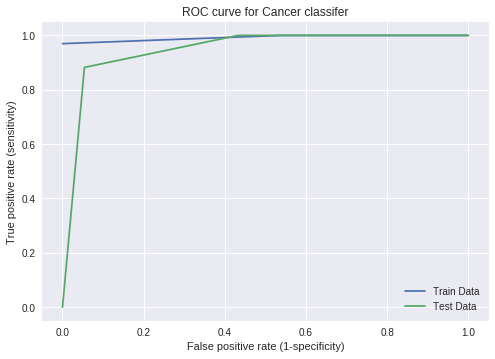

In [228]:
# Model trained with default values 
# ROC curve for train data
fpr,tpr,thresholds = roc_curve(out_train, out_train_pred,pos_label=2)
# plot the curve
plt.plot(fpr, tpr, label="Train Data")
# ROC curve for test data
fpr, tpr, thresholds = roc_curve(out_test, out_test_pred, pos_label=2)
# Plotting the curves
plt.plot(fpr, tpr, label="Test Data")
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)
plt.show()

As you can see from the graph train data is clearly overfitted, which means random forest with default parameters did not work for this dataset. Test data is still learning well but model is not really working with default parameters.



Step 10: Change the Error Metric
---
Choose another error metric other than you used in Step 8 and evaluate the performance of the model
(optimized) on Training and Test dataset by generating the accuracy of the model based on the new
metric. Compare the results and explain which error metric is better for your modeling and why?


In [229]:
# Let's check f1 score on our classification
from sklearn.metrics import f1_score
print("f1_score: ", f1_score(out_test, out_test_pred, average=None))

Log-Loss:  [ 1.          0.875       0.88235294]


I personally prefer ROC curve for more visual allowance when it comes to measuring error/accuracy. But f1 score is showing the error of each class in very simplistic way.